In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
sns.set_theme()

In [3]:
data = pd.read_csv('../Data/SQLout_employees.csv')

In [4]:
data2018ft = data.query('arrangement == "FT" & year==2018', inplace=False )[['nace',
                          'esize_class',  'collective',  'gender',
                          'age_class', 'lpk',  'education', 'hourly_rate']]

In [5]:
def hr_in_categories(dataframe, column):
    """function to estimate if categorical feature is
     an important predictor and if it can be reclassified"""
    sns.boxplot(data=dataframe, x=column, y='hourly_rate')
    plt.ylim(0, 15)
    plt.show();
    tukey = pairwise_tukeyhsd(endog=dataframe['hourly_rate'], 
                        groups=dataframe[column], alpha=0.05)
    print(tukey)
    count = dataframe[column].value_counts()
    print('Value Counts:', count, sep='\n')

# 'hourly_rate' variation in predictor groups

## 'esize_class'

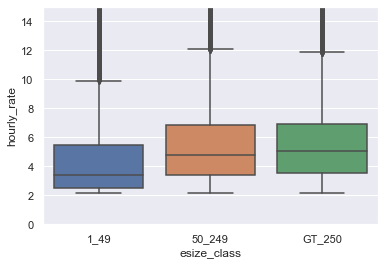

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1_49 50_249   1.1461   -0.0  1.0218 1.2703   True
  1_49 GT_250   1.1105   -0.0  0.9942 1.2268   True
50_249 GT_250  -0.0356 0.7244 -0.1445 0.0734  False
---------------------------------------------------
Value Counts:
GT_250    15966
50_249    11525
1_49       9294
Name: esize_class, dtype: int64


In [6]:
hr_in_categories(data2018ft, 'esize_class')

In [7]:
reclassify = { '1_49': 0, '50_249': 1, 'GT_250': 1}
data2018ft['esize_class_nc']=data2018ft['esize_class'].replace(reclassify)
data2018ft.drop(columns='esize_class', inplace=True )

## 'collective'

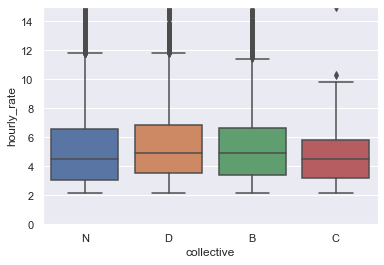

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C  -0.6311 0.3155 -1.5762   0.314  False
     B      D   0.2036 0.1214 -0.0335  0.4406  False
     B      N   -0.094 0.6759 -0.3092  0.1212  False
     C      D   0.8347 0.0964 -0.0948  1.7641  False
     C      N   0.5371 0.4417 -0.3871  1.4612  False
     D      N  -0.2976    0.0  -0.428 -0.1672   True
----------------------------------------------------
Value Counts:
N    27190
D     7213
B     2268
C      114
Name: collective, dtype: int64


In [8]:
hr_in_categories(data2018ft, 'collective')

Can be droped.

In [9]:
data2018ft.drop(columns='collective', inplace=True)

## 'gender'

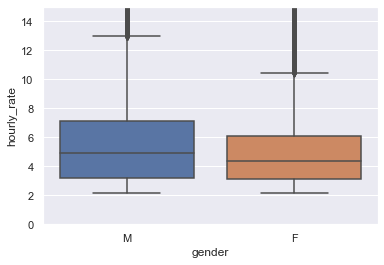

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.8066  -0.0 0.7283 0.8848   True
-------------------------------------------------
Value Counts:
M    19974
F    16811
Name: gender, dtype: int64


In [10]:
hr_in_categories(data2018ft, 'gender')

In [11]:
data2018ft = pd.get_dummies(data2018ft,prefix='gen',columns=['gender'] )

## 'age_class'

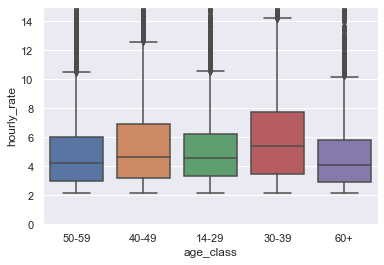

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 14-29  30-39   1.2492    0.0  1.0861  1.4124   True
 14-29  40-49   0.6221    0.0  0.4595  0.7848   True
 14-29  50-59  -0.0887 0.5594 -0.2494  0.0721  False
 14-29    60+  -0.1999 0.0558 -0.4028   0.003  False
 30-39  40-49  -0.6271    0.0 -0.7893 -0.4649   True
 30-39  50-59  -1.3379    0.0 -1.4981 -1.1777   True
 30-39    60+  -1.4492    0.0 -1.6517 -1.2466   True
 40-49  50-59  -0.7108    0.0 -0.8706  -0.551   True
 40-49    60+  -0.8221    0.0 -1.0242 -0.6199   True
 50-59    60+  -0.1113 0.5539 -0.3118  0.0893  False
----------------------------------------------------
Value Counts:
50-59    8614
40-49    8199
30-39    8108
14-29    8006
60+      3858
Name: age_class, dtype: int64


In [12]:
hr_in_categories(data2018ft, 'age_class')

In [13]:
reclassify = { '14-29': 0, '30-39': 2, '40-49': 1, '50-59': 0, '60+': 0}
data2018ft['age_class_nc']=data2018ft['age_class'].map(reclassify)
data2018ft.drop(columns='age_class', inplace=True )

## 'education'

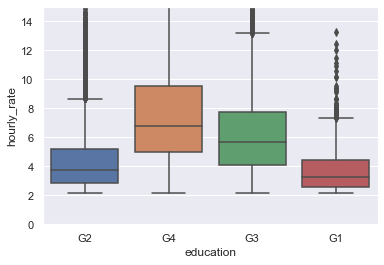

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    G1     G2   0.5137   0.0 0.2433 0.7841   True
    G1     G3   2.7877  -0.0 2.5094 3.0659   True
    G1     G4   4.3739  -0.0 4.0892 4.6587   True
    G2     G3   2.2739  -0.0 2.1614 2.3864   True
    G2     G4   3.8602  -0.0 3.7325 3.9879   True
    G3     G4   1.5863  -0.0 1.4427 1.7298   True
-------------------------------------------------
Value Counts:
G2    19371
G3     9559
G4     6680
G1     1175
Name: education, dtype: int64


In [14]:
hr_in_categories(data2018ft, 'education')

In [15]:
reclassify = { 'G1': 0, 'G2': 1, 'G3': 2, 'G4': 3}
data2018ft['education_nc']=data2018ft['education'].map(reclassify)
data2018ft.drop(columns='education', inplace=True )

## 'nace' (high cardinality )

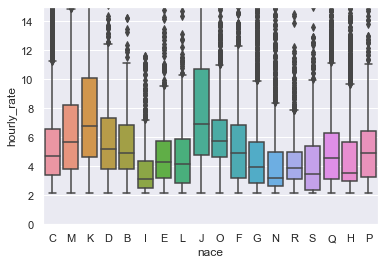

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C  -0.5978 0.1723 -1.2794  0.0838  False
     B      D  -0.0195    1.0 -0.8301  0.7911  False
     B      E  -1.1563    0.0 -1.9294 -0.3832   True
     B      F  -0.4738 0.7086 -1.2035  0.2559  False
     B      G  -1.1443    0.0 -1.8573 -0.4313   True
     B      H  -1.1689    0.0 -1.8705 -0.4673   True
     B      I  -2.2757    0.0 -3.0526 -1.4987   True
     B      J   2.5323    0.0  1.7981  3.2665   True
     B      K    2.419    0.0  1.6608  3.1772   True
     B      L  -1.1456 0.0013 -2.0475 -0.2438   True
     B      M   0.8912 0.0027   0.162  1.6203   True
     B      N   -1.662    0.0 -2.3826 -0.9413   True
     B      O    0.118    1.0 -0.6011  0.8371  False
     B      P  -0.9081 0.0037  -1.664 -0.1523   True
     B      Q  -0.7209 0.0483 -1.4397 -0.0022   True
     B      R  -1.6703    0.0  -2.444 -0.8966 

In [16]:
hr_in_categories(data2018ft, 'nace')

## 'lpk' (very high cardinality )

In [17]:
data2018ft['lpk1'] = data2018ft['lpk'] // 100
data2018ft['lpk2'] = data2018ft['lpk'] // 10
data2018ft

,nace,lpk,hourly_rate,esize_class_nc,gen_F,gen_M,age_class_nc,education_nc,lpk1,lpk2
44952,C,722,8.13,0,0,1,0,1,7,72
44953,C,721,8.20,0,0,1,1,1,7,72
44954,C,722,8.20,0,0,1,0,1,7,72
44955,C,334,2.51,0,1,0,1,1,3,33
44956,M,522,2.19,1,1,0,1,1,5,52
...,...,...,...,...,...,...,...,...,...,...
88111,N,711,2.84,0,0,1,0,1,7,71
88112,N,711,2.84,0,0,1,0,1,7,71
88113,N,711,2.84,0,0,1,2,1,7,71
88114,N,711,2.84,0,0,1,0,1,7,71


In [18]:
data2018ft.value_counts('lpk1')

lpk1
2    9220
7    5817
8    5807
3    4363
1    3486
5    3296
9    2902
4    1622
0     263
6       9
dtype: int64

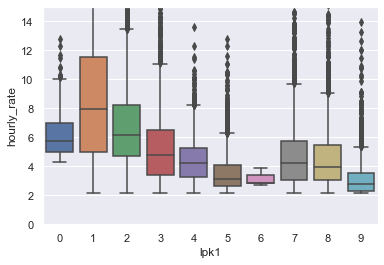

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.4329    0.0   2.7481  4.1178   True
     0      2   0.7759 0.0093   0.1062  1.4457   True
     0      3   -0.944 0.0005   -1.624  -0.264   True
     0      4   -1.731    0.0  -2.4429  -1.019   True
     0      5  -2.6345    0.0  -3.3208 -1.9483   True
     0      6  -3.0919 0.1757  -6.7225  0.5387  False
     0      7  -1.5342    0.0  -2.2094  -0.859   True
     0      8  -1.6952    0.0  -2.3704   -1.02   True
     0      9  -3.0173    0.0  -3.7069 -2.3276   True
     1      2   -2.657    0.0    -2.87 -2.4441   True
     1      3  -4.3769    0.0  -4.6202 -4.1336   True
     1      4  -5.1639    0.0  -5.4858  -4.842   True
     1      5  -6.0675    0.0  -6.3277 -5.8073   True
     1      6  -6.5248    0.0 -10.0995 -2.9502   True
     1      7  -4.9671    0.0  -5.1965 -4.7377   True
     1      8  -5.1282    0.

In [19]:
hr_in_categories(data2018ft, 'lpk1')

 Remove classes with small mumber of cases: lpk1 == 6 "Qualified agricultural, forestry and fisheries workers" and lpk1 == 0 "Professions of the armed forces".
Classes lpk1 4 (Clerical support workers), 7 (Craft and related trades workers) and 8 (Plant and machine operators, and assemblers) can be joined to one group.

In [20]:
data2018ft.drop(data2018ft[(data2018ft.lpk1 == 6) | (data2018ft.lpk1 == 0) ].index, inplace=True)
reclassify = { 1: 100, 2: 200, 3: 300, 4: 478, 5: 500, 7: 478, 8: 478, 9: 900}
data2018ft['lpk1_nc']=data2018ft['lpk1'].map(reclassify)

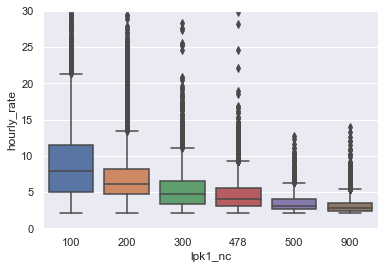

In [21]:
sns.boxplot(data=data2018ft, x='lpk1_nc', y='hourly_rate')
plt.ylim(0, 30);

### Upper 'hourly_rate' outlier flag by 'lpk1_nc'

In [22]:
def outlier_iqr_upper(x, n=1.5):
    """ check if x is outlier using IQR"""
    iqr = x.quantile(0.75)-x.quantile(0.25)
    upper_lim = x.quantile(0.75)+iqr*n
    return x>=upper_lim


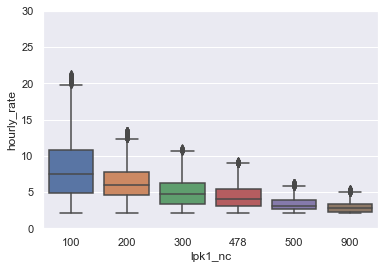

In [23]:
data2018ft['outlier_iqr_lpk1_nc'] = data2018ft.groupby('lpk1_nc')['hourly_rate'].apply(outlier_iqr_upper, n=1.5)
sns.boxplot(data=data2018ft.query('outlier_iqr_lpk1_nc ==False'), x='lpk1_nc', y='hourly_rate')
plt.ylim(0, 30);

In [24]:
data2018ft.groupby('lpk1_nc')['outlier_iqr_lpk1_nc'].value_counts()

lpk1_nc  outlier_iqr_lpk1_nc
100      False                   3267
         True                     219
200      False                   8706
         True                     514
300      False                   4251
         True                     112
478      False                  12904
         True                     342
500      False                   3148
         True                     148
900      False                   2743
         True                     159
Name: outlier_iqr_lpk1_nc, dtype: int64

In [25]:
lpk_agg = data2018ft.groupby(['lpk1_nc', 'lpk2', 'lpk'])['hourly_rate'].agg(['mean', 'count', 'std']).reset_index()

In [26]:
sns.set_theme(rc={"figure.figsize":(6, 4)})

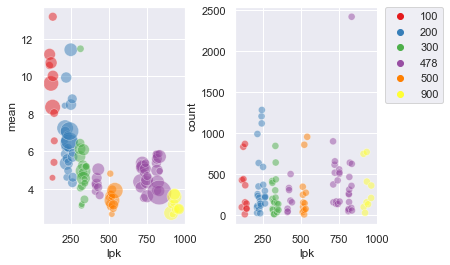

In [27]:
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.35)
sns.scatterplot(ax=axes[0], data=lpk_agg, x='lpk', y='mean', hue='lpk1_nc',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False)
sns.scatterplot(ax=axes[1], data=lpk_agg, x='lpk', y='count', hue='lpk1_nc', 
                s=50, alpha=0.5,palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

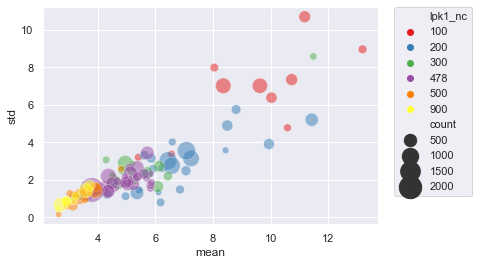

In [28]:
sns.scatterplot(data=lpk_agg, x='mean', y='std', hue='lpk1_nc',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

## combined 'nace' and ('lpk1', 'lpk1_nc' or 'lpk2')

In [29]:
lpk1_nace_agg = data2018ft.groupby(['nace', 'lpk1'])['hourly_rate'].agg(['mean', 'count', 'std'])
lpk1_nace_agg.shape

(143, 3)

In [30]:
lpk1_nc_nace_agg = data2018ft.groupby(['nace', 'lpk1_nc'])['hourly_rate'].agg(['mean', 'count', 'std'])
lpk1_nc_nace_agg.shape

(108, 3)

In [31]:
lpk2_nace_agg = data2018ft.groupby(['nace', 'lpk2'])['hourly_rate'].agg(['mean', 'count', 'std'])
lpk2_nace_agg.shape

(532, 3)

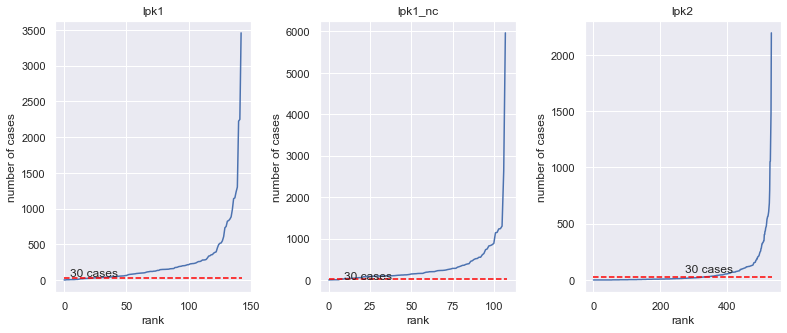

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
plt.subplots_adjust(wspace = 0.35)

ax1.plot(lpk1_nace_agg['count'].sort_values().values)
ax1.hlines(30, 0, len(lpk1_nace_agg), colors='red', linestyles='dashed')
ax1.text(25, 100, '30 cases ', ha='center', va='center')
ax1.set_ylabel('number of cases')
ax1.set_xlabel('rank')
ax1.set_title('lpk1')

ax2.plot(lpk1_nc_nace_agg['count'].sort_values().values)
ax2.hlines(30, 0, len(lpk1_nc_nace_agg), colors='red', linestyles='dashed')
ax2.text(25, 100, '30 cases ', ha='center', va='center')
ax2.set_ylabel('number of cases')
ax2.set_xlabel('rank')
ax2.set_title('lpk1_nc')

ax3.plot(lpk2_nace_agg['count'].sort_values().values)
ax3.hlines(30, 0, len(lpk2_nace_agg), colors='red', linestyles='dashed')
ax3.text(350, 100, '30 cases ', ha='center', va='center')
ax3.set_ylabel('number of cases')
ax3.set_xlabel('rank')
ax3.set_title('lpk2');

In [43]:
hr_mean = data2018ft.query('outlier_iqr_lpk1_nc ==False')['hourly_rate'].mean().round(2)
hr_mean

5.1

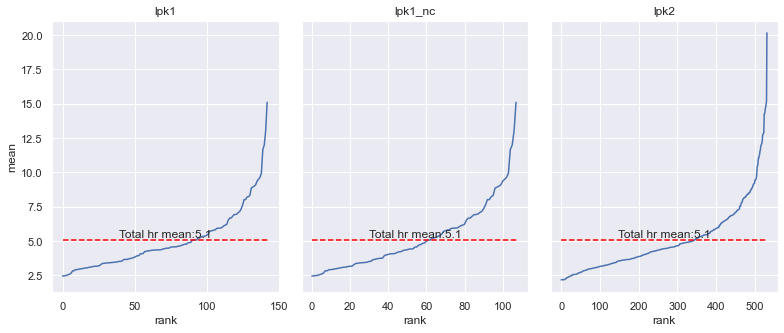

In [44]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(13,5))
plt.subplots_adjust(wspace = 0.1)

ax1.plot(lpk1_nace_agg['mean'].sort_values().values)
ax1.hlines(hr_mean, 0, len(lpk1_nace_agg), colors='red', linestyles='dashed')
ax1.text(len(lpk1_nace_agg)/2, hr_mean, f'Total hr mean:{hr_mean}', ha='center', va='bottom')
ax1.set_ylabel('mean')
ax1.set_xlabel('rank')
ax1.set_title('lpk1')

ax2.plot(lpk1_nc_nace_agg['mean'].sort_values().values)
ax2.hlines(hr_mean, 0, len(lpk1_nc_nace_agg), colors='red', linestyles='dashed')
ax2.text(len(lpk1_nc_nace_agg)/2, hr_mean, f'Total hr mean:{hr_mean}', ha='center', va='bottom')
ax2.set_xlabel('rank')
ax2.set_title('lpk1_nc')

ax3.plot(lpk2_nace_agg['mean'].sort_values().values)
ax3.hlines(hr_mean, 0, len(lpk2_nace_agg), colors='red', linestyles='dashed')
ax3.text(len(lpk2_nace_agg)/2, hr_mean, f'Total hr mean:{hr_mean}', ha='center', va='bottom')
ax3.set_xlabel('rank')
ax3.set_title('lpk2');

In [45]:
lpk1_nace_agg = data2018ft.groupby(['nace','lpk1'])['hourly_rate'].agg(['mean', 'count']).reset_index()
lpk1_nc_nace_agg = data2018ft.groupby(['nace','lpk1_nc'])['hourly_rate'].agg(['mean', 'count']).reset_index()
lpk2_nace_agg = data2018ft.groupby(['nace','lpk2'])['hourly_rate'].agg(['mean', 'count']).reset_index()

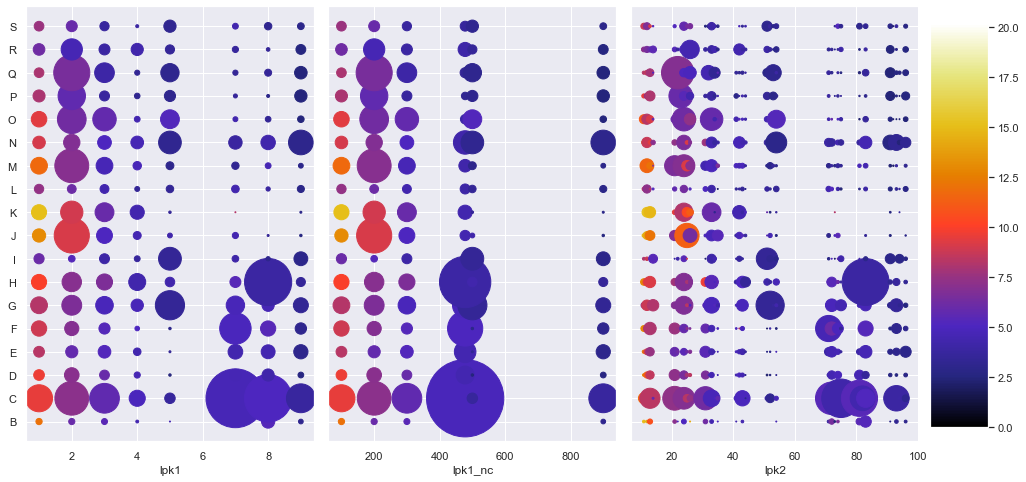

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
plt.subplots_adjust(wspace = 0.05)
norm=plt.Normalize(0, max(lpk2_nace_agg['mean']))
sc = ax1.scatter(data=lpk1_nace_agg, x='lpk1', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm)
ax1.set_xlabel('lpk1')

ax2.scatter(data=lpk1_nc_nace_agg, x='lpk1_nc', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm);
ax2.set_xlabel('lpk1_nc')

ax3.scatter(data=lpk2_nace_agg, x='lpk2', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm);
ax3.set_xlabel('lpk2')

cbar_ax = f.add_axes([0.91, 0.15, 0.05, 0.7])
f.colorbar(sc, cax=cbar_ax);

In [47]:
lpk1_nc_nace_agg.query(f'count>5 & mean>{hr_mean}').sort_values('lpk1_nc').value_counts('lpk1_nc')/len(lpk1_nc_nace_agg['nace'].unique())*100

lpk1_nc
100    100.000000
200     94.444444
300     44.444444
478      5.555556
500      5.555556
dtype: float64

In [53]:
lpk1_nc_nace_agg.query(f'count>5 & mean>{hr_mean}').sort_values('lpk1_nc')

,nace,lpk1_nc,mean,count
0,B,100,11.994103,39
102,S,100,7.632979,94
42,I,100,6.023010,103
60,L,100,7.346437,87
36,H,100,9.933043,230
30,G,100,8.230035,282
66,M,100,11.655250,280
24,F,100,8.854255,235
48,J,100,13.056420,176
18,E,100,8.321207,116


Percentage of economy sectors (nace) above mean hr for first level (lpk1) of profession classification. In general, proffesion is more important than employment sector. Hr is highest in lpk1=1 (Managers) and  lpk1=2 (Professionals) profession class and lowest in lpk1=5 (Service and sales workers) and lpk1=9 (Elementary occupations). For the same profession hr tends to be higher in nace=K (Financial and insurance activities), nace=J (Information and communications) and nace=M (Professional, scientific and technical activities) sectors. 

In [49]:
reclassify = { 'K': 1, 'J': 1,'M': 1}
data2018ft['nace_nc']=data2018ft['nace'].map(reclassify)
data2018ft['nace_nc'].fillna(0, inplace = True)
data2018ft['nace_nc'] = data2018ft['nace_nc'].astype(int)

In [50]:
data2018ft

,nace,lpk,hourly_rate,esize_class_nc,gen_F,gen_M,age_class_nc,education_nc,lpk1,lpk2,lpk1_nc,outlier_iqr_lpk1_nc,nace_nc
44952,C,722,8.13,0,0,1,0,1,7,72,478,False,0
44953,C,721,8.20,0,0,1,1,1,7,72,478,False,0
44954,C,722,8.20,0,0,1,0,1,7,72,478,False,0
44955,C,334,2.51,0,1,0,1,1,3,33,300,False,0
44956,M,522,2.19,1,1,0,1,1,5,52,500,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88111,N,711,2.84,0,0,1,0,1,7,71,478,False,0
88112,N,711,2.84,0,0,1,0,1,7,71,478,False,0
88113,N,711,2.84,0,0,1,2,1,7,71,478,False,0
88114,N,711,2.84,0,0,1,0,1,7,71,478,False,0


In [54]:
data2018ft.to_csv('../Data/LT_DU_data_for_ML.csv', index=False)